# **Разбор практики 1.**

## **Задача 2**. Cделать нейрон, соответствующий оператору НЕ.

In [1]:
import torch

In [2]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(1, 1, bias=True)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

In [3]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[-0.4746]], requires_grad=True),
 Parameter containing:
 tensor([0.8451], requires_grad=True))

In [4]:
neuron.fc.weight.data = torch.tensor([[-1.0]])
neuron.fc.bias.data = torch.tensor([1.0])
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[-1.]], requires_grad=True),
 Parameter containing:
 tensor([1.], requires_grad=True))

In [5]:
x = torch.tensor([0.0])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

In [6]:
x = torch.tensor([1.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

## **Задача 3**. Cделать нейрон, соответствующий оператору И.

In [7]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(2, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

In [8]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[ 0.1956, -0.2291]], requires_grad=True),
 Parameter containing:
 tensor([0.0592], requires_grad=True))

In [9]:
neuron.fc.weight.data = torch.tensor([[1.0, 1.0]])
neuron.fc.bias.data = torch.tensor([-1.5])
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[1., 1.]], requires_grad=True),
 Parameter containing:
 tensor([-1.5000], requires_grad=True))

In [10]:
x = torch.tensor([0.0, 0.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

In [11]:
x = torch.tensor([1.0, 0.0 ])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

In [12]:
x = torch.tensor([0.0, 1.0 ])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

In [13]:
x = torch.tensor([1.0, 1.0 ])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

## **Задача 4**. Cделать нейрон, соответствующий оператору ИЛИ.

In [14]:
neuron.fc.weight.data = torch.tensor([[1., 1.]])
neuron.fc.bias.data = torch.tensor([-0.5])

In [15]:
x = torch.tensor([0.0, 0.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

In [16]:
x = torch.tensor([1.0, 0.0 ])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

In [17]:
x = torch.tensor([0.0, 1.0 ])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

In [18]:
x = torch.tensor([1.0, 1.0 ])
neuron(x)

tensor([1.], grad_fn=<NotImplemented>)

## **Задача 5**. Cделать нейрон, соответствующий оператору XOR.

In [19]:
neuron.fc.weight.data = torch.tensor([[0.0, 0.0]])
neuron.fc.bias.data = torch.tensor([0.0])

In [20]:
x = torch.tensor([0.0, 0.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

# **Занятие 2.**

# [Pytorch autograd](https://pytorch.org/docs/stable/autograd.html)

[Tutorial](https://www.youtube.com/watch?v=MswxJw-8PvE)

[Slides](https://app.diagrams.net/#G1bq3akhmA5DGRCiFYJfNPSn7il2wvCkEY)

[Torch C++ Binary operations](https://github.com/pytorch/pytorch/blob/c5872e6d6d8fd9b8439b914c143d49488335f573/aten/src/ATen/native/cpu/BinaryOpsKernel.cpp)

[Torch C++ Activations](https://github.com/pytorch/pytorch/blob/c5872e6d6d8fd9b8439b914c143d49488335f573/aten/src/ATen/native/cpu/Activation.cpp)

In [21]:
def show_tensor_params(*tensors):
  for x in tensors:
    print('---')
    print(f"data - {x.data}")
    print(f"grad - {x.grad}")
    print(f"grad_fn - {x.grad_fn}")
    print(f"req_grad - {x.requires_grad}")
    print(f"is_leaf - {x.is_leaf}")

In [22]:
x = torch.tensor(5.0)
show_tensor_params(x)

---
data - 5.0
grad - None
grad_fn - None
req_grad - False
is_leaf - True


All Tensors that have **requires_grad** which is **False** will be leaf Tensors by convention.

For Tensors that have **requires_grad** which is **True**, they will be leaf Tensors if they were created by the user. This means that they are not the result of an operation and so **grad_fn** is None.

Only leaf Tensors will have their **grad** populated during a call to backward(). To get grad populated for non-leaf Tensors, you can use retain_grad().[[Link]](https://pytorch.org/docs/stable/generated/torch.Tensor.is_leaf.html#torch.Tensor.is_leaf)

In [23]:
#Slide A4
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0)
c = a*b

c.backward()
# (2 * c).backward()

In [24]:
show_tensor_params(a, b, c)

---
data - 2.0
grad - 3.0
grad_fn - None
req_grad - True
is_leaf - True
---
data - 3.0
grad - None
grad_fn - None
req_grad - False
is_leaf - True
---
data - 6.0
grad - None
grad_fn - <MulBackward0 object at 0x7f6ae833dea0>
req_grad - True
is_leaf - False


/tmp/ipykernel_31044/138193020.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /opt/conda/conda-bld/pytorch_1666643003845/work/build/aten/src/ATen/core/TensorBody.h:480.)
  print(f"grad - {x.grad}")


In [25]:
#Slide Simple5

In [26]:
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
c = a*b
d = torch.tensor(4.0, requires_grad=True)
e = c*d

c.retain_grad()
e.retain_grad()
e.backward()

In [27]:
show_tensor_params(a, b, c, d, e)

---
data - 2.0
grad - 12.0
grad_fn - None
req_grad - True
is_leaf - True
---
data - 3.0
grad - 8.0
grad_fn - None
req_grad - True
is_leaf - True
---
data - 6.0
grad - 4.0
grad_fn - <MulBackward0 object at 0x7f6ae833ee00>
req_grad - True
is_leaf - False
---
data - 4.0
grad - 6.0
grad_fn - None
req_grad - True
is_leaf - True
---
data - 24.0
grad - 1.0
grad_fn - <MulBackward0 object at 0x7f6ae833ee00>
req_grad - True
is_leaf - False


In [28]:
#In place 1
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
c = a*b
d = torch.tensor(4.0, requires_grad=True)
e = c*d
c += 1

try:
    e.backward()
except RuntimeError as re:
    print(re)

one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor []], which is output 0 of AddBackward0, is at version 1; expected version 0 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).


In [29]:
print(c._version)
print(d._version)

1
0


In [30]:
#In place 2
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
c = a*b
d = torch.tensor(4.0, requires_grad=True)
e = c+d
c += 1

e.backward()

In [31]:
print(c._version)
print(d._version)

1
0


In [32]:
#In place 3
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
c = a*b
d = torch.tensor(4.0, requires_grad=True)
e = c+d
c = c + 1

e.backward()

In [33]:
print(c._version)
print(d._version)

0
0


In [34]:
# отвязка от графа
k = e.detach()

In [35]:
k.storage == e.storage

False

In [36]:
show_tensor_params(e, k)

---
data - 10.0
grad - None
grad_fn - <AddBackward0 object at 0x7f6ae833ebc0>
req_grad - True
is_leaf - False
---
data - 10.0
grad - None
grad_fn - None
req_grad - False
is_leaf - True


/tmp/ipykernel_31044/138193020.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /opt/conda/conda-bld/pytorch_1666643003845/work/build/aten/src/ATen/core/TensorBody.h:480.)
  print(f"grad - {x.grad}")


# Создание собственной библиотеки автоматического дифференцирования

In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
import random
from pytorch_lightning import seed_everything


def set_random_seed(s):
    random.seed(s)
    np.random.seed(s)
    torch.manual_seed(s)
    seed_everything(s, workers=True)


SEED = 17
set_random_seed(SEED)

Global seed set to 17


### Простой пример

In [39]:
def f(x):
  return 3*x**2 - 4*x + 5

In [40]:
f(3.0)

20.0

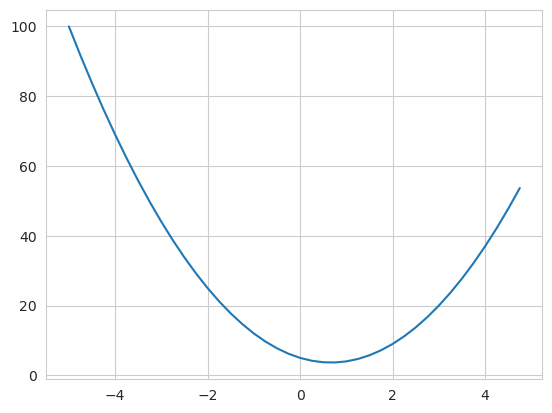

In [41]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys);

In [42]:
h = 0.000001
x = 2
(f(x + h) - f(x))/h

8.000003001384925

### Более сложный пример

In [43]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [44]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694
d1 4.0001
d2 3.9997999999999987
slope -3.000000000010772
d1 3.9997999999999987
d2 4.00000001
slope 2.0001000000124947


https://pytorch.org/tutorials/beginner/examples_autograd/polynomial_custom_function.html

In [45]:
from torch.autograd import Function

In [46]:
class Exp(Function):
  """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

  @staticmethod
  def forward(ctx, i):
    """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
    """
    result = i.exp()
    ctx.save_for_backward(result)
    return result

  @staticmethod
  def backward(ctx, grad_output):
    """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
    """
    print(ctx.saved_tensors)
    result, = ctx.saved_tensors
    return grad_output * result

In [47]:
# Use it by calling the apply method
input = torch.tensor(2.0, requires_grad=True)
output = Exp.apply(input)
output

tensor(7.3891, grad_fn=<ExpBackward>)

In [48]:
import math
math.exp(2.0)

7.38905609893065

In [49]:
output.backward()
show_tensor_params(output)
show_tensor_params(input)

(tensor(7.3891, grad_fn=<ExpBackward>),)
---
data - 7.389056205749512
grad - None
grad_fn - <torch.autograd.function.ExpBackward object at 0x7f6ac8da6e30>
req_grad - True
is_leaf - False
---
data - 2.0
grad - 7.389056205749512
grad_fn - None
req_grad - True
is_leaf - True


/tmp/ipykernel_31044/138193020.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /opt/conda/conda-bld/pytorch_1666643003845/work/build/aten/src/ATen/core/TensorBody.h:480.)
  print(f"grad - {x.grad}")


**Задание**: реализуйте backward для Polynomial 0.5 * (5 * input ** 3 - 3 * input)

In [50]:
import torch


class Polynomial(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result = 0.5 * (5 * input ** 3 - 3 * input)
        grad = 7.5 * input ** 2 - 1.5
        ctx.save_for_backward(grad)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        print(ctx.saved_tensors)
        grad, = ctx.saved_tensors
        return grad_output * grad
        

In [51]:
input = torch.tensor(2.0, requires_grad=True)
Polynomial.apply(input)

tensor(17., grad_fn=<PolynomialBackward>)

In [52]:
p = Polynomial.apply(input)
p.backward()
show_tensor_params(input)

(tensor(28.5000),)
---
data - 2.0
grad - 28.5
grad_fn - None
req_grad - True
is_leaf - True


In [53]:
input_tensor = torch.tensor(2.0, requires_grad=True)
e = Exp.apply(input_tensor)
p = Polynomial.apply(e)
print(p)

tensor(997.4885, grad_fn=<PolynomialBackward>)


In [54]:
p.backward()
show_tensor_params(input_tensor)

(tensor(407.9861),)
(tensor(7.3891, grad_fn=<ExpBackward>),)
---
data - 2.0
grad - 3014.632568359375
grad_fn - None
req_grad - True
is_leaf - True


In [55]:
input_tensor = torch.tensor(2.0, requires_grad=True)
e = Exp.apply(input_tensor)
e = Exp.apply(e)
print(e)

tensor(1618.1781, grad_fn=<ExpBackward>)


In [56]:
e.backward()
show_tensor_params(input_tensor)

(tensor(1618.1781, grad_fn=<ExpBackward>),)
(tensor(7.3891, grad_fn=<ExpBackward>),)
---
data - 2.0
grad - 11956.80859375
grad_fn - None
req_grad - True
is_leaf - True


In [57]:
input_tensor = torch.tensor(2.0, requires_grad=True)
exp = Exp()
e = exp.apply(input_tensor)
e = exp.apply(e)
print(e)

tensor(1618.1781, grad_fn=<ExpBackward>)


In [58]:
e.backward()
show_tensor_params(input_tensor)

(tensor(1618.1781, grad_fn=<ExpBackward>),)
(tensor(7.3891, grad_fn=<ExpBackward>),)
---
data - 2.0
grad - 11956.80859375
grad_fn - None
req_grad - True
is_leaf - True


Практическое задание: написать собственный движок автоматического дифференцирования, а именно: реализовать

In [59]:
class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self.grad = 0
        # internal variables used for autograd graph construction
        self._backward = lambda prev_grad: None  # function
        self._prev = set(_children)  # set of Value objects
        self._op = _op  # the op that produced this node, string ('+', '-', ....)

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data)

        def _backward(pred_grad):
            self.grad += 1 * pred_grad
            other.grad += 1 * pred_grad

        out._backward = _backward
        out._prev = {self, other}
        out._op = '+'

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(other.data * self.data)

        def _backward(pred_grad):
            self.grad += other.data * pred_grad
            other.grad += self.data * pred_grad

        out._backward = _backward
        out._prev = {self, other}
        out._op = '*'

        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other)

        def _backward(pred_grad):
            self.grad += other * self.data ** (other - 1) * pred_grad

        out._backward = _backward
        out._prev = {self}
        out._op = '^'

        return out

    def relu(self):
        out = Value(self.data if self.data > 0 else 0)

        def _backward(pred_grad):
            self.grad += (1 if self.data > 0 else 0) * pred_grad

        out._backward = _backward
        out._prev = {self}
        out._op = 'ReLU'

        return out

    def backward(self):

        # topological order all of the children in the graph
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        # go one variable at a time and apply the chain rule to get its gradient
        self.grad = 1
        for v in reversed(topo):
            v._backward(v.grad)

    def __neg__(self):  # -self
        return self * -1

    def __radd__(self, other):  # other + self
        return self + other

    def __sub__(self, other):  # self - other
        return self + (-other)

    def __rsub__(self, other):  # other - self
        return other + (-self)

    def __rmul__(self, other):  # other * self
        return self * other

    def __truediv__(self, other):  # self / other
        return self * other ** -1

    def __rtruediv__(self, other):  # other / self
        return other * self ** -1

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"



In [60]:
def test_sanity_check():

    x = Value(-4.0)
    z = 2 * x + 2 + x
  
    q = z.relu() + z * x
    h = (z * z).relu()
    y = h + q + q * x
    y.backward()
    xmg, ymg = x, y

    x = torch.Tensor([-4.0]).double()
    x.requires_grad = True
    z = 2 * x + 2 + x
    q = z.relu() + z * x
    h = (z * z).relu()
    y = h + q + q * x
    y.backward()
    xpt, ypt = x, y

    
    # forward pass went well
    assert ymg.data == ypt.data.item()
    # backward pass went well
    print(xmg, xpt, xpt.grad)
    assert xmg.grad == xpt.grad.item()


def test_more_ops():

    a = Value(-4.0)
    b = Value(2.0)
    c = a + b
    d = a * b + b**3
    c += c + 1
    c += 1 + c + (-a)
    d += d * 2 + (b + a).relu()
    d += 3 * d + (b - a).relu()
    e = c - d
    f = e**2
    g = f / 2.0
    g += 10.0 / f
    g.backward()
    amg, bmg, gmg = a, b, g

    a = torch.Tensor([-4.0]).double()
    b = torch.Tensor([2.0]).double()
    a.requires_grad = True
    b.requires_grad = True
    c = a + b
    d = a * b + b**3
    c = c + c + 1
    c = c + 1 + c + (-a)
    d = d + d * 2 + (b + a).relu()
    d = d + 3 * d + (b - a).relu()
    e = c - d
    f = e**2
    g = f / 2.0
    g = g + 10.0 / f
    g.backward()
    apt, bpt, gpt = a, b, g

    tol = 1e-6
    # forward pass went well
    assert abs(gmg.data - gpt.data.item()) < tol
    # backward pass went well
    assert abs(amg.grad - apt.grad.item()) < tol
    assert abs(bmg.grad - bpt.grad.item()) < tol

In [61]:
a = Value(-4.0)
b = Value(2.0)
d = Value(3.0)

In [62]:
c = a + b
e = c * d
e.backward()

In [63]:
test_sanity_check()

Value(data=-4.0, grad=46.0) tensor([-4.], dtype=torch.float64, requires_grad=True) tensor([46.], dtype=torch.float64)


In [64]:
test_more_ops()

# Обучение на основе собственной бибилотеки

## Многослойный перцептрон на основе класса Value

In [65]:
import random


class Module:

    def zero_grad(self):
        self.grad = 0

    def parameters(self):
        return []


class Neuron(Module):

    def __init__(self, nin, nonlin=True):
        self.w = [Value(np.random.rand()) for i in range(nin)]
        self.b = Value(np.random.rand())
        self.nonlin = nonlin

    def __call__(self, x):
        batch_s = len(x)
        nin = len(x[0])
        res = [self.b for i in range(batch_s)]
        for i in range(batch_s):
            for j in range(nin):
                res[i] += self.w[j] * x[i][j]
        return [r.relu() for r in res] if self.nonlin else res

    def zero_grad(self):
        for weight in self.w:
            weight.grad = 0
        self.b.grad = 0

    def parameters(self):
        return self.w + [self.b]

    def __repr__(self):
        return f"{'ReLU' if self.nonlin else 'Linear'}Neuron({len(self.w)})"


class Layer(Module):

    def __init__(self, nin, nout, **kwargs):
        self.neurons = [Neuron(nin, kwargs['nonlin']) for i in range(nout)]

    def __call__(self, x):
        out = [[] for i in range(len(x))]
        for n in self.neurons:
            n_out = n(x)
            for i in range(len(x)):
                out[i].append(n_out[i])
        return out[0] if len(out) == 1 else out

    def zero_grad(self):
        for n in self.neurons:
            n.zero_grad()

    def parameters(self):
        l_params = []
        for n in self.neurons:
            l_params.extend(n.parameters())
        return l_params

    def __repr__(self):
        return f"Layer of [{', '.join(str(n) for n in self.neurons)}]"


class MLP(Module):

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i + 1], nonlin=(i != len(nouts) - 1)) for i in range(len(nouts))]

    def __call__(self, x):
        for l in self.layers:
            x = l(x)
        return x

    def zero_grad(self):
        for l in self.layers:
            l.zero_grad()

    def parameters(self):
        nn_params = []
        for l in self.layers:
            nn_params.extend(l.parameters())
        return nn_params

    def __repr__(self):
        repr = '\n'.join(str(layer) for layer in self.layers)
        return f"MLP of [{repr}]"

## Обучение многослойного перцептрона

Сам перцептрон

In [66]:
nn = MLP(3, [4, 4, 1])  # 3 входящих признака, 1-й слой из 4-х нейронов, 2-й слой из 4-х нейронов, 3-й слой из одного нейрона
# 1-й слой: 3 входящих признака, 4 исходящих признака
# 2-й слой: 4 входящих признака, 4 исходящих признака
# 3-й слой: 4 входящих признака, 1 исходящий признак

# print(model)  # model -> nn ?
print(nn)
# print("number of parameters", len(model.parameters()))  # model -> nn ?
print("number of parameters", len(nn.parameters()))

MLP of [Layer of [ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3)]
Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)]
Layer of [LinearNeuron(4)]]
number of parameters 41


Набор данных

In [67]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [68]:
set_random_seed(SEED)
learning_rate = 0.01

loss_hist = []
acc_hist = []

for k in range(150):
    nn.zero_grad()

    # forward
    pred = nn(xs)

    # calculate loss (mean square error)
    total_loss = Value(0)
    for i in range(len(ys)):
        total_loss += (pred[i][0] - ys[i]) ** 2
    total_loss /= len(xs)

    # backward (zero_grad + backward)
    total_loss.backward()
    loss_hist.append(total_loss.data)

    mean_y = 0
    for y in ys:
        mean_y += y
    mean_y /= len(ys)
    var_y = 0
    for y in ys:
        var_y += (y - mean_y) ** 2
    var_y /= len(ys)
    acc = 1 - total_loss.data / var_y
    acc_hist.append(0 if acc < 0 else acc)

    # update
    # for layer_p in nn.parameters():
    #     for neuron_p in layer_p:
    #         for w in neuron_p[0]:
    #             w.data -= w.grad * learning_rate
    #         neuron_p[1].data -= neuron_p[1].grad
    for p in nn.parameters():
        p.data -= p.grad * learning_rate

    if k % 1 == 0:
        print(f"step: {k}, loss: {round(total_loss.data, 6)}, accuracy R^2: {round(acc * 100, 2)}%")

print(pred, ys)

Global seed set to 17


step: 0, loss: 66.386018, accuracy R^2: -6538.6%
step: 1, loss: 1.064098, accuracy R^2: -6.41%
step: 2, loss: 1.054274, accuracy R^2: -5.43%
step: 3, loss: 1.044591, accuracy R^2: -4.46%
step: 4, loss: 1.03503, accuracy R^2: -3.5%
step: 5, loss: 1.025575, accuracy R^2: -2.56%
step: 6, loss: 1.016213, accuracy R^2: -1.62%
step: 7, loss: 1.006932, accuracy R^2: -0.69%
step: 8, loss: 0.997723, accuracy R^2: 0.23%
step: 9, loss: 0.988575, accuracy R^2: 1.14%
step: 10, loss: 0.979479, accuracy R^2: 2.05%
step: 11, loss: 0.970428, accuracy R^2: 2.96%
step: 12, loss: 0.961412, accuracy R^2: 3.86%
step: 13, loss: 0.952425, accuracy R^2: 4.76%
step: 14, loss: 0.943459, accuracy R^2: 5.65%
step: 15, loss: 0.934508, accuracy R^2: 6.55%
step: 16, loss: 0.925564, accuracy R^2: 7.44%
step: 17, loss: 0.91662, accuracy R^2: 8.34%
step: 18, loss: 0.907671, accuracy R^2: 9.23%
step: 19, loss: 0.89871, accuracy R^2: 10.13%
step: 20, loss: 0.88973, accuracy R^2: 11.03%
step: 21, loss: 0.880726, accuracy R

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 7)
%config InlineBackend.figure_format = 'svg'

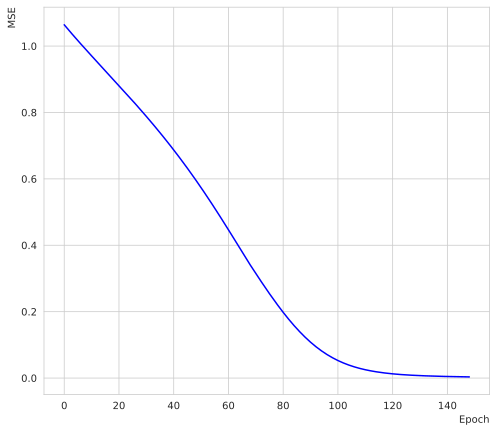

In [70]:
plt.xlabel('Epoch', loc='right')
plt.ylabel('MSE', loc='top')
sns.lineplot(loss_hist[1:], color='blue');

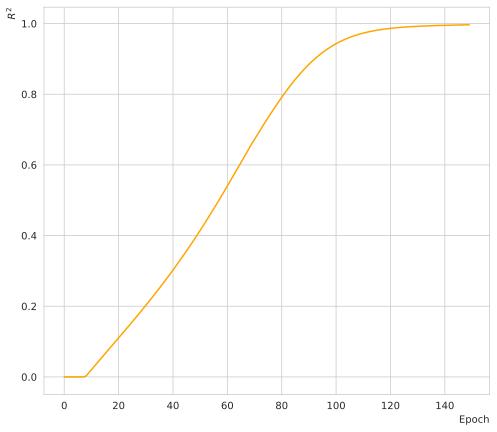

In [71]:
plt.xlabel('Epoch', loc='right')
plt.ylabel(r'$R^2$', loc='top')
sns.lineplot(acc_hist, color='orange');

# Домашнее задание

**Домашнее задание 1.** Доделать практику. Оформить код в три отдельных модуля `autograd`, `nn`, `train`

**Домашнее задание 2 (Опционально).** Создать свою функцию softmax, наследуемую от `torch.autograd.Function` и имплементировать forward и backward проход. Сравнить со стандартной функцией в Pytorch. 
[Создание функций](https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_custom_function.html) [Софтмакс](https://congyuzhou.medium.com/softmax-3408fb42d55a)

In [72]:
from torch.autograd import Function

In [333]:
import math


class Softmax(Function):

    @staticmethod
    def forward(ctx, vector):

        denominator = 0
        denominator = vector.exp().sum()
        result = vector.exp() / denominator

        grad = torch.zeros(len(result), len(result))

        for i in range(len(grad)):
            for j in range(len(result)):
                if i == j:
                    grad[i][j] = result[i] * (1 - result[j])
                else:
                    grad[i][j] = - result[i] * result[j]

        ctx.save_for_backward(grad)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        print(ctx.saved_tensors)
        grad, = ctx.saved_tensors
        return grad.matmul(grad_output)

In [334]:
input = torch.tensor((1.1, 2.4, 2.0, 5.6), requires_grad=True)
custom_output = Softmax.apply(input)
custom_output.retain_grad()
custom_output

tensor([0.0103, 0.0378, 0.0253, 0.9266], grad_fn=<SoftmaxBackward>)

In [335]:
true = torch.tensor((0.0, 1.0, 1.0, 0.0))
loss = ((custom_output - true) ** 2).sum()
loss.backward()
show_tensor_params(custom_output)
show_tensor_params(input)

(tensor([[ 0.0102, -0.0004, -0.0003, -0.0095],
        [-0.0004,  0.0363, -0.0010, -0.0350],
        [-0.0003, -0.0010,  0.0247, -0.0235],
        [-0.0095, -0.0350, -0.0235,  0.0680]]),)
---
data - tensor([0.0103, 0.0378, 0.0253, 0.9266])
grad - tensor([ 0.0206, -1.9245, -1.9494,  1.8532])
grad_fn - <torch.autograd.function.SoftmaxBackward object at 0x7f6ac0b9be20>
req_grad - True
is_leaf - False
---
data - tensor([1.1000, 2.4000, 2.0000, 5.6000])
grad - tensor([-0.0162, -0.1329, -0.0897,  0.2389])
grad_fn - None
req_grad - True
is_leaf - True


In [336]:
input = torch.tensor((1.1, 2.4, 2.0, 5.6), requires_grad=True)
sm = torch.nn.Softmax(dim=0)
torch_output = sm(input)
torch_output.retain_grad()
torch_output

tensor([0.0103, 0.0378, 0.0253, 0.9266], grad_fn=<SoftmaxBackward0>)

In [337]:
true = torch.tensor((0.0, 1.0, 1.0, 0.0))
loss = ((torch_output - true) ** 2).sum()
loss.backward()
show_tensor_params(torch_output)
show_tensor_params(input)

---
data - tensor([0.0103, 0.0378, 0.0253, 0.9266])
grad - tensor([ 0.0206, -1.9245, -1.9494,  1.8532])
grad_fn - <SoftmaxBackward0 object at 0x7f6ab947f460>
req_grad - True
is_leaf - False
---
data - tensor([1.1000, 2.4000, 2.0000, 5.6000])
grad - tensor([-0.0162, -0.1329, -0.0897,  0.2389])
grad_fn - None
req_grad - True
is_leaf - True


**Домашнее задание 3 (Опционально).** Добавить функцию софтмакс в собственну библиотеку автоматического дифференцирования. Сравнить с пунктом 2

In [ ]:
# Ваш код

**Домашнее задание 4 (Опционально).** Добавить визуализацию обучения. Потом мы пройдем более подробно.

https://docs.wandb.ai/guides/integrations/pytorch

https://docs.wandb.ai/ref/python/watch  

https://docs.wandb.ai/guides/track/jupyter

In [ ]:
!pip install wandb

In [ ]:
!wandb login

In [ ]:
import wandb
run = wandb.init(project="polynom_learning_")

In [ ]:
run.finish()